# Machine Learning em Python - Utilização da Normalização com alguns Algoritmos de Classificação

# Algoritmos de Classificação

Não temos como saber qual algoritmo vai funcionar da melhor forma com os nossos dados. Precisamos testar com alguns algoritmos nosso dataset. Para tanto iremos testar nosso conjunto de dados com os Algoritmos de Machine Learning listados abaixo:

- LR - Logistic Regression
- KNN - K Nearest Neighbors
- CART - Classification and Regression Trees
- SVM -  Support Vector Machines
- RF - Random Forest

# Normalização 

É uma das primeiras tarefas dentro do pré-processamento, ou seja, colocar seus dados na mesma escala. 

Muitos algoritmos de Machine Learning irão se beneficiar com esse processo e produzirão melhores resultados. 

Os arquivos jupyter notebook produzidos fornecerão exemplos práticos utilizando alguns métodos, com alguns algoritmos de classificação.

Instruções e links de utilização.

1) Utilize o shell [clear_files.sh] para limpar os arquivos .csv e .png 

2) Utilize o shell [run_all_ipynb.sh], pois existe uma sequência para a construção do produto final no arquivo [resultados/resultados.csv]

3) Abaixo a relação dos arquivos jupyter notebook que serão utilizados:

- Normalizacao_without.ipynb
- Normalizacao_Binarizer.ipynb
- Normalizacao_MinMaxScaler.ipynb
- Normalizacao_Normalizer.ipynb
- Normalizacao_StandardScaler.ipynb

4) Links para os métodos utilizados do scikit-learn

## Binarizer 

Podemos definir um valor em nossos dados, ao qual chamamos de threshold, ou seja, definimos que todos os valores acima de um determinado valor será marcado como sendo 1 e todos valores iguais ou abaixo deste threshold serão marcados como sendo 0. 
Também chamado de Binarização. Sendo útil quando temos probabilidades e queremos transformar os dados em algo com mais significado. No scikit-learn a função é chamada de Binarizer().

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Binarizer.html  

## MinMaxScaler 

Chamada de normalização que coloca os dados em uma escala entre 0 e 1. Sendo muito para  otimização, sendo usado no core dos algoritmos de Machine Learning, como gradient descent. 
Muito útil para algoritmos como regressão e redes neurais e algoritmos que usam medidas de distância, como KNN. O scikit-learn possui a chamada MinMaxScaler().

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html  

## Normalizer 

Método utilizado para o pré-processamento é útil quando temos datasets esparsos (com muitos zeros) e atributos com escala muito variada. Mostra utilizade quando usamos algoritmos de redes neurais ou que usam medida de distância, como KNN. O scikit-learn possui a chamada Normalizer().

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html 

## StandardScaler

Essa técnica serve para transformar os atributos com distribuição Gaussiana (normal) e diferentes médias e desvios padrão em uma distribuição Gaussiana com a média igual a 0 e desvio padrão igual a 1. 
Isso é útil para algoritmos que esperam que os dados estejam com uma distribuição Gaussiana, como regressão linear, regressão logística e linear discriminant analysis. Funciona quando os dados já estão na mesma escala. O scikit-learn possui a chamada StandardScaler().

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html


# Processo para o Desenvolvimento de Machine Learning

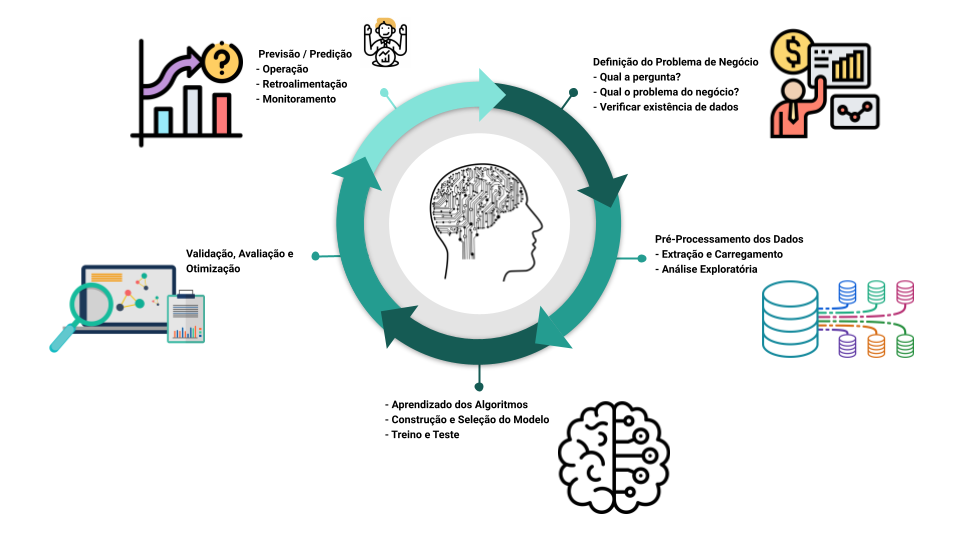

In [2]:
from IPython.display import Image
Image('imagens/Processo.png')

## Definição do Problema de Negócio

## Pré-Processamento dos Dados

### Extração e Carregamento

In [3]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.11.4


In [4]:
import sklearn as sl
import warnings
warnings.filterwarnings("ignore")
sl.__version__

'1.2.2'

In [5]:
from pandas import read_csv

# Carregando os dados
arquivo = 'dados/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values
print(array.shape)

(768, 9)


### Análise Exploratória

### Informações sobre os atributos:

1. Number of times pregnant 
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. Diastolic blood pressure (mm Hg) 
4. Triceps skin fold thickness (mm) 
5. 2-Hour serum insulin (mu U/ml) 
6. Body mass index (weight in kg/(height in m)^2) 
7. Diabetes pedigree function 
8. Age (years) 
9. Class variable (0 or 1) 

### Estatística Descritiva

In [6]:
# Visualizando as dimensões
dados.shape

(768, 9)

In [7]:
# Tipo de dados de cada atributo
dados.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [8]:
# Visualizar os dados
dados

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
# Sumário estatístico
dados.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Verificando se a variável resposta está balanceada

In [10]:
# Distribuição das classes
dados.groupby('class').size()

class
0    500
1    268
dtype: int64

### Realizando o balanceamento de Classes

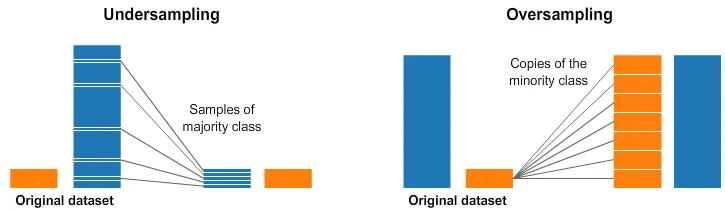

In [37]:
from IPython.display import Image
Image('imagens/under_over_sampling.png')

### Tamanho da Amostra e seu Poder dentro do teste estatístico

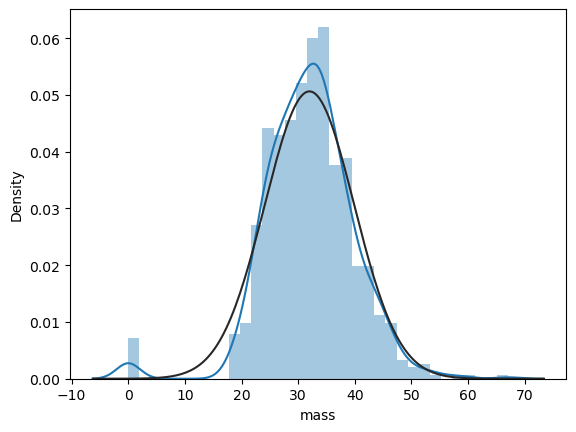

In [38]:
import seaborn as sns
from scipy import stats
sns.distplot(dados.mass, fit = stats.norm);

In [39]:
# Power analysis
from statsmodels.stats.power import TTestIndPower

In [40]:
# Initiate the power analysis
power_analysis = TTestIndPower()
# Calculate sample size
sample_size = power_analysis.solve_power(effect_size = 0.2, alpha = 0.05, power = 0.80, alternative = 'two-sided')
# Print results
print('O tamanho da amostra necessário é', round(sample_size))

O tamanho da amostra necessário é 393


Atenção >>>>> Se o mínimo de tuplas que necessito para obter um [poder do teste estatístico](https://pt.wikipedia.org/wiki/Poder_do_teste_estat%C3%ADstico) de 80% é 393 tuplas.

Qual será o poder do meu modelo com 536 tuplas?

Sabendo que teremos 268 amostras de cada classe, ou seja, 536 tuplas.

In [41]:
power = power_analysis.power(effect_size = 0.2, alpha = 0.05, nobs1 = 536, ratio = 1, alternative = 'two-sided')
# Print results
print('O poder para o teste de hipótese é', round(power, 2))

O poder para o teste de hipótese é 0.91


### Random Undersampling

In [12]:
# under-sampling
from sklearn import preprocessing
import pandas as pd

In [13]:
# Separa as quantidades das classes em variáveis diferentes
count_class_0, count_class_1 = dados['class'].value_counts()

# Mostra variáveis do processo
dados['class'].value_counts()

class
0    500
1    268
Name: count, dtype: int64

In [14]:
# Mostra variáveis do processo
count_class_0

500

In [15]:
# Mostra variáveis do processo
count_class_1

268

In [16]:
# Separa os DataSet conforme a Classe
target_class_0 = dados[dados['class'] == 0]
target_class_1 = dados[dados['class'] == 1]

# Mostra variáveis do processo
target_class_0

,preg,plas,pres,skin,test,mass,pedi,age,class
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [17]:
# Mostra variáveis do processo
target_class_1

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [18]:
# Gera valores para a Classe 0 .... baseado nos exemplos da Classe 1
data_class_0_under = target_class_0.sample(count_class_1, random_state=9)

# Mostra variáveis do processo
target_class_0.sample(count_class_1, random_state=9)

,preg,plas,pres,skin,test,mass,pedi,age,class
567,6,92,62,32,126,32.0,0.085,46,0
416,1,97,68,21,0,27.2,1.095,22,0
196,1,105,58,0,0,24.3,0.187,21,0
503,7,94,64,25,79,33.3,0.738,41,0
505,10,75,82,0,0,33.3,0.263,38,0
...,...,...,...,...,...,...,...,...,...
433,2,139,75,0,0,25.6,0.167,29,0
119,4,99,76,15,51,23.2,0.223,21,0
526,1,97,64,19,82,18.2,0.299,21,0
499,6,154,74,32,193,29.3,0.839,39,0


In [19]:
# Mostra variáveis do processo
data_class_0_under

,preg,plas,pres,skin,test,mass,pedi,age,class
567,6,92,62,32,126,32.0,0.085,46,0
416,1,97,68,21,0,27.2,1.095,22,0
196,1,105,58,0,0,24.3,0.187,21,0
503,7,94,64,25,79,33.3,0.738,41,0
505,10,75,82,0,0,33.3,0.263,38,0
...,...,...,...,...,...,...,...,...,...
433,2,139,75,0,0,25.6,0.167,29,0
119,4,99,76,15,51,23.2,0.223,21,0
526,1,97,64,19,82,18.2,0.299,21,0
499,6,154,74,32,193,29.3,0.839,39,0


In [20]:
# Concateca os Novos valores da Classe 0  utilizando os dados da Classe 1
data_test_under = pd.concat([data_class_0_under, target_class_1], axis=0)

# Mostra variáveis do processo
data_test_under

,preg,plas,pres,skin,test,mass,pedi,age,class
567,6,92,62,32,126,32.0,0.085,46,0
416,1,97,68,21,0,27.2,1.095,22,0
196,1,105,58,0,0,24.3,0.187,21,0
503,7,94,64,25,79,33.3,0.738,41,0
505,10,75,82,0,0,33.3,0.263,38,0
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [21]:
# Mostra variáveis do processo
data_test_under['class'].value_counts()

class
0    268
1    268
Name: count, dtype: int64

### Gerar o novo dataset balanceado

In [23]:
data_test_under.to_csv('dados/pima-data-banceled.csv')